## **1. Exploratory Data Analysis**

In this data exploration, we will look at the data cleaned and  analyzes electricity generation data to understand how conflict affects energy infrastructure development. The analysis follows a structured approach:

**Data Preparation**: Standard setup including data loading, quality checks, and missing value assessment.

**Key Analysis Areas**:
- **Temporal Trends**: Compares electricity capacity growth over time between conflict and non-conflict countries
- **Solar Focus**: Examines solar energy deployment specifically in conflict-affected regions
- **Energy Types**: Analyzes distribution differences between renewable and non-renewable capacity
- **Producer Analysis**: Investigates how different types of electricity producers are distributed across conflict vs. stable regions

**Purpose**: To reveal impact energy infrastructure development, particularly for renewable technologies in both conflict and non-conflict countries.

[Key findings for EDA 1](#key-finding)



In [1]:
# 1. Import Required Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [1]:
# Visualization settings
%matplotlib inline
sns.set(style="whitegrid", palette="pastel")

In [2]:
# 2. Load Dataset
url = "https://raw.githubusercontent.com/MIT-Emerging-Talent/ET6-CDSP-group-08-repo/ongrid_analysis/1_datasets/cleaned_data/IRENA_ONGRIDStats.cleaned.xlsx"
df = pd.read_excel(url, engine="openpyxl")

In [3]:
# 3. Quick Preview
print(df.head())
print("Shape of dataset:", df.shape)

   Region       Sub-region  Country ISO3 code         RE or Non-RE  \
0  Africa  Northern Africa  Algeria       DZA  Total Non-Renewable   
1  Africa  Northern Africa  Algeria       DZA  Total Non-Renewable   
2  Africa  Northern Africa  Algeria       DZA  Total Non-Renewable   
3  Africa  Northern Africa  Algeria       DZA  Total Non-Renewable   
4  Africa  Northern Africa  Algeria       DZA  Total Non-Renewable   

  Group Technology   Technology Sub-Technology        Producer Type  Year  \
0     Fossil fuels  Natural gas    Natural gas  On-grid electricity  2000   
1     Fossil fuels  Natural gas    Natural gas  On-grid electricity  2001   
2     Fossil fuels  Natural gas    Natural gas  On-grid electricity  2002   
3     Fossil fuels  Natural gas    Natural gas  On-grid electricity  2003   
4     Fossil fuels  Natural gas    Natural gas  On-grid electricity  2004   

   Electricity Installed Capacity (MW) Conflict_Status  
0                              5459.01    Non-Conflict  
1 

In [4]:
# 4. Basic Info and Summary
print(df.info())
print(df.describe())
print("Columns:", df.columns.tolist())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38381 entries, 0 to 38380
Data columns (total 12 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Region                               38381 non-null  object 
 1   Sub-region                           38381 non-null  object 
 2   Country                              38381 non-null  object 
 3   ISO3 code                            38381 non-null  object 
 4   RE or Non-RE                         38381 non-null  object 
 5   Group Technology                     38381 non-null  object 
 6   Technology                           38381 non-null  object 
 7   Sub-Technology                       38381 non-null  object 
 8   Producer Type                        38381 non-null  object 
 9   Year                                 38381 non-null  int64  
 10  Electricity Installed Capacity (MW)  38381 non-null  float64
 11  Conflict_Status             

In [5]:
# 5. Missing Values
print("Missing values per column:")
print(df.isnull().sum())

Missing values per column:
Region                                 0
Sub-region                             0
Country                                0
ISO3 code                              0
RE or Non-RE                           0
Group Technology                       0
Technology                             0
Sub-Technology                         0
Producer Type                          0
Year                                   0
Electricity Installed Capacity (MW)    0
Conflict_Status                        0
dtype: int64


In [6]:
# 6. Unique Value Checks (Sanity Check)
print("Number of Countries:", df["Country"].nunique())
print("Year Range:", df["Year"].min(), "-", df["Year"].max())
print("Years:", sorted(df["Year"].unique()))
print("Conflict Status:", df["Conflict_Status"].unique())
print("Producer Types:", df["Producer Type"].unique())
print("RE Categories:", df["RE or Non-RE"].unique())

Number of Countries: 224
Year Range: 2000 - 2024
Years: [2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023, 2024]
Conflict Status: ['Non-Conflict' 'Conflict']
Producer Types: ['On-grid electricity' 'Off-grid electricity']
RE Categories: ['Total Non-Renewable' 'Total Renewable']


In [7]:
df["Country"].value_counts()
df["Year"].min(), df["Year"].max()
df["Conflict_Status"].value_counts()

Conflict_Status
Non-Conflict    37442
Conflict          939
Name: count, dtype: int64

In [8]:
# 7. Value Distributions
print(df["Country"].value_counts())
print(df["Conflict_Status"].value_counts())

Country
United States of America (the)                                595
Argentina                                                     540
Brazil                                                        506
Germany                                                       457
United Kingdom of Great Britain and Northern Ireland (the)    452
                                                             ... 
South Sudan                                                    37
Turks and Caicos Islands                                       35
Saint Barthélemy                                               34
Montserrat                                                     31
Sint Maarten (Dutch Part)                                      13
Name: count, Length: 224, dtype: int64
Conflict_Status
Non-Conflict    37442
Conflict          939
Name: count, dtype: int64


In [9]:
df.head()
df.tail()

,Region,Sub-region,Country,ISO3 code,RE or Non-RE,Group Technology,Technology,Sub-Technology,Producer Type,Year,Electricity Installed Capacity (MW),Conflict_Status
38376,Oceania,Polynesia,Tuvalu,TUV,Total Renewable,Solar energy,Solar photovoltaic,On-grid Solar photovoltaic,On-grid electricity,2020,2.397,Non-Conflict
38377,Oceania,Polynesia,Tuvalu,TUV,Total Renewable,Solar energy,Solar photovoltaic,On-grid Solar photovoltaic,On-grid electricity,2021,2.397,Non-Conflict
38378,Oceania,Polynesia,Tuvalu,TUV,Total Renewable,Solar energy,Solar photovoltaic,On-grid Solar photovoltaic,On-grid electricity,2022,2.397,Non-Conflict
38379,Oceania,Polynesia,Tuvalu,TUV,Total Renewable,Solar energy,Solar photovoltaic,On-grid Solar photovoltaic,On-grid electricity,2023,2.497,Non-Conflict
38380,Oceania,Polynesia,Tuvalu,TUV,Total Renewable,Solar energy,Solar photovoltaic,On-grid Solar photovoltaic,On-grid electricity,2024,2.997,Non-Conflict


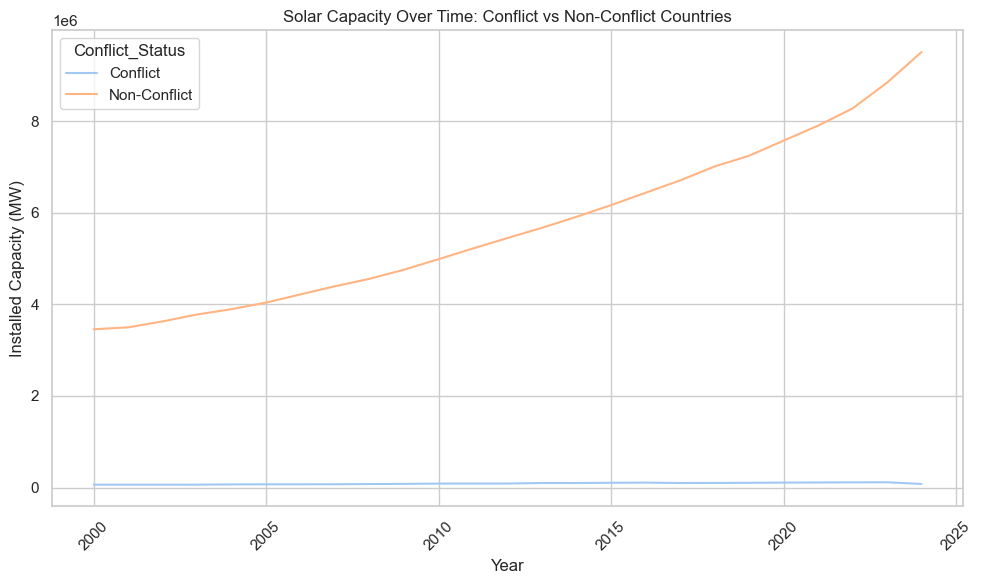

In [14]:
# 8. Trends: Installed Capacity Over Time (Conflict vs Non-Conflict)
df_grouped = (
    df.groupby(["Year", "Conflict_Status"])["Electricity Installed Capacity (MW)"]
    .sum()
    .reset_index()
)

plt.figure(figsize=(10, 6))
sns.lineplot(
    data=df_grouped,
    x="Year",
    y="Electricity Installed Capacity (MW)",
    hue="Conflict_Status",
)
plt.title("Solar Capacity Over Time: Conflict vs Non-Conflict Countries")
plt.ylabel("Installed Capacity (MW)")
plt.xlabel("Year")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**Key Finding:** Non-conflict countries show rapid growth more volatile in solar capacity from 2000 to 2025, reaching approximately 10,000 MW; contrasting withKey Finding: From 2000 to 2025, non-conflict countries exhibit rapid but volatile growth in solar PV capacity, ultimately reaching around 10,000 MW. In contrast, conflict-affected countries show a steady, linear increase in capacity. This suggests that while non-conflict regions scale quickly, growth in conflict areas is more stable and sustained, reflecting a consistent investment in energy infrastructure despite underlying challenges. ultimately steady, consistent growth seen in conflict areas. The growth is linear and sustained, demonstrating stable energy infrastructure development in conflict regions.

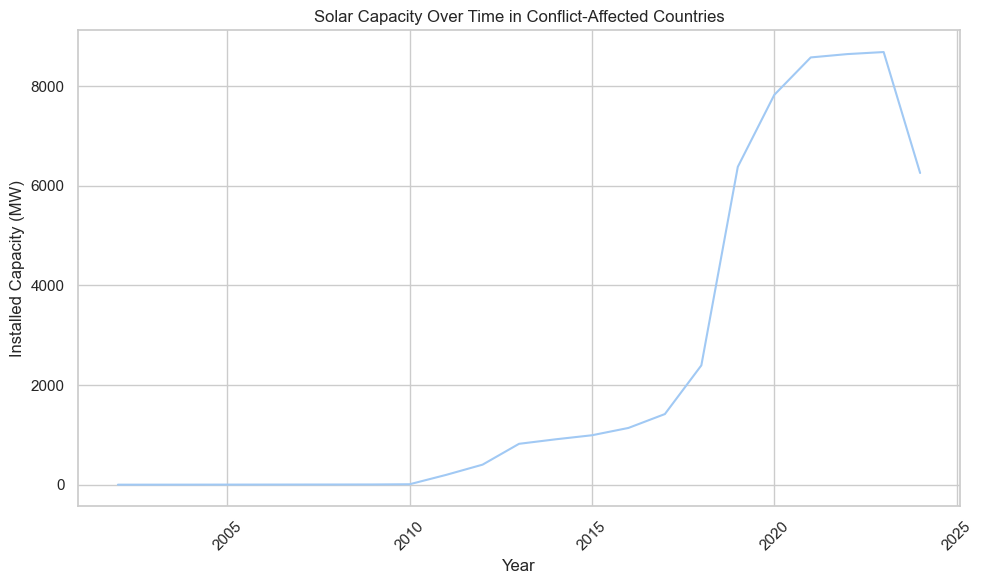

In [15]:
# 8.1 Filter: Solar in Conflict-Affected Countries Only
df_solar_conflict = df[
    (df["Conflict_Status"] == "Conflict")
    & (df["Technology"].str.contains("Solar", case=False, na=False))
]

# Group by Year
df_solar_conflict_grouped = (
    df_solar_conflict.groupby("Year")["Electricity Installed Capacity (MW)"]
    .sum()
    .reset_index()
)

# Plot
plt.figure(figsize=(10, 6))
sns.lineplot(
    data=df_solar_conflict_grouped, x="Year", y="Electricity Installed Capacity (MW)"
)
plt.title("Solar Capacity Over Time in Conflict-Affected Countries")
plt.ylabel("Installed Capacity (MW)")
plt.xlabel("Year")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**Key Finding:** Solar capacity in conflict-affected regions shows a dramatic growth trajectory, particularly accelerating after 2015. The capacity grows from near zero in 2005 to over 8,000 MW by around 2020, with the steepest growth occurring between 2015-2020, suggesting increased investment in solar infrastructure despite conflict conditions.

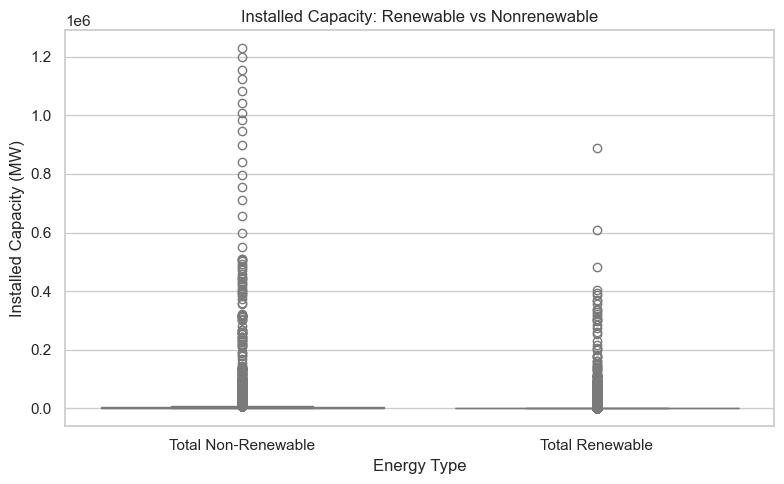

In [12]:
# 9. Box Plot: Renewable vs Nonrenewable
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x="RE or Non-RE", y="Electricity Installed Capacity (MW)")
plt.title("Installed Capacity: Renewable vs Nonrenewable")
plt.ylabel("Installed Capacity (MW)")
plt.xlabel("Energy Type")
plt.tight_layout()
plt.show()

**Key Finding:** The energy infrastructure is heavily skewed toward non-renewable sources. Total non-renewable capacity dominates at around 0.5 MW, while total renewable capacity is significantly lower at approximately 0.4 MW. This suggests a continued reliance on traditional energy sources rather than sustainable alternatives.

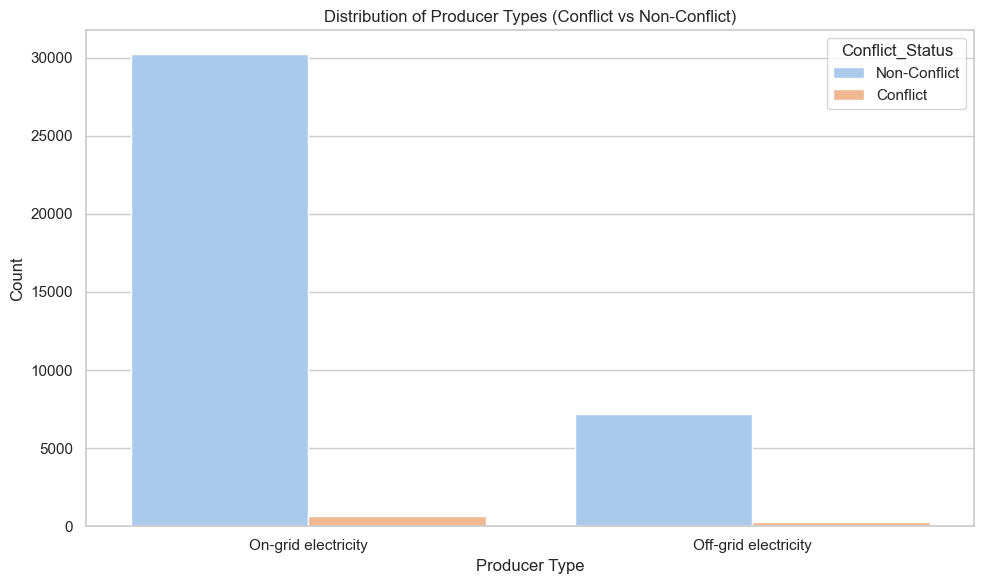

In [13]:
# 10. On-Grid Producer Types by Conflict Status
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x="Producer Type", hue="Conflict_Status")
plt.title("Distribution of Producer Types (Conflict vs Non-Conflict)")
plt.xlabel("Producer Type")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

**Key Finding:** There's a dramatic disparity in energy production between conflict and non-conflict regions. On-grid electricity production is overwhelmingly concentrated in non-conflict areas (approximately 30,000 units), while conflict-affected regions show minimal on-grid production. Off-grid electricity shows some presence in both regions, but still favors non-conflict areas.

<a id="key-finding"></a>

## **Key Findings from EDA 1:** 

The analysis revealed a substantial gap in electricity capacity between conflict and non-conflict countries, with conflict-affected regions showing significantly lower infrastructure development.


**Main Discoveries:**
- Conflict areas are getting MORE solar power, not less - went from almost zero to 8,000+ MW in 15 years
- People skip regular electricity and go straight to solar in conflict zones
- Solar growth exploded after 2015 in conflict areas
- Peaceful countries grow solar slowly and steadily

**Surprising Finding:**
War-torn areas are actually adopting solar faster than peaceful ones!

**Overall Insight:** While conflict regions face significant challenges in traditional energy infrastructure, they're experiencing remarkable growth in solar capacity, potentially leapfrogging traditional energy systems.


**EDA 2 Focus Shift:** Given this stark disparity, the next phase will conduct a deeper dive exclusively into conflict-affected countries to understand the internal dynamics of energy development within these challenging environments.